# Import Dependencies

In [4]:
import pandas as pd
import numpy as np

from config import CSV_FILE_URL
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

# Read the CSV

In [5]:
# Read the CSV file into a dataframe
df = pd.read_csv(CSV_FILE_URL)
df.shape

(284807, 31)

# Data Cleaning

Checking to see if there are any null values in the dataset.

In [6]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.shape

(284807, 31)

It could be seen that there are **no null values** in the dataset.

# Data Exploration

Checking Data distribution w.r.t Target feature

In [7]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


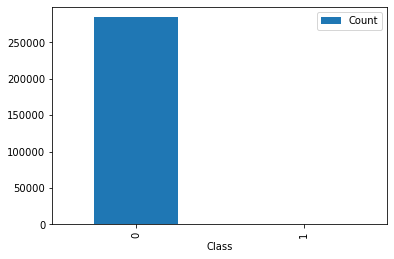

In [8]:
grouped_df = df[['Class','Time']].groupby('Class').count()
grouped_df = grouped_df.rename(columns={"Time":"Count"})
grouped_df.plot(kind="bar")

It is evident from the above plot that data is **highly imbalanced**. The dataset has only 492 fraudulent transactions out of a total of 284,807 transactions, which is a mere **0.17%**.

# Defining features

Defining the predictor features and the target feature.

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
# Selecting predictor features. This will be used as x values.
selected_features = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
selected_features.shape

(284807, 30)

In [11]:
# Defining predictor and target features to X and y respectively.
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (284807, 30) (284807, 1)


# Create a Train Test Split

Using `Class` for the y values (target feature)

In [12]:
# Using sklearn's `train_test_split` to split the data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (213605, 30) (213605, 1) (71202, 30) (71202, 1)


# Data Pre-processing

Scale the data using the MinMaxScaler

In [15]:
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

In [16]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Neural Network Classifier Model

### Train the Model

In [17]:
neuralNetworkModel = Sequential()
neuralNetworkModel

In [18]:
number_inputs = 30
number_hidden_nodes = 200
neuralNetworkModel.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [19]:
number_classes = 2
neuralNetworkModel.add(Dense(units=number_classes, activation='softmax'))

## Model Summary

In [20]:
neuralNetworkModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               6200      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

Now that we have our model architecture defined, we must compile the model using a loss function and optimizer. We can also specify additional training metrics such as accuracy.

In [21]:
neuralNetworkModel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training the Model
Finally, we train our model using our training data

In [22]:
# Fit (train) the model
neuralNetworkModel.fit(
    X_train_scaled,
    y_train_categorical,
    validation_data=(X_test_scaled,  y_test_categorical),
    epochs=100,
    verbose= 3
)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

## Quantifying the Model

In [23]:
model_loss, model_accuracy = neuralNetworkModel.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2226/2226 - 3s - loss: 0.0040 - accuracy: 0.9993
Loss: 0.003969603218138218, Accuracy: 0.9993118047714233


In [24]:
# predict probabilities for test set
neuralNetworkModel_probs = neuralNetworkModel.predict(X_test_scaled, verbose=0)
# predict crisp classes for test set
neuralNetworkModel_classes = neuralNetworkModel.predict_classes(X_test_scaled, verbose=0)

C:\Users\dalsa\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
# reduce to 1d array
neuralNetworkModel_probs = neuralNetworkModel_probs.flatten()
neuralNetworkModel_classes = neuralNetworkModel_classes.flatten()

In [26]:
y_test.flatten()

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test.flatten(), neuralNetworkModel_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test.flatten(), neuralNetworkModel_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test.flatten(), neuralNetworkModel_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.flatten(), neuralNetworkModel_classes)
print('F1 score: %f' % f1)

Accuracy: 0.999312
Precision: 0.762295
Recall: 0.823009
F1 score: 0.791489


In [28]:
matrix = confusion_matrix(y_test.flatten(), neuralNetworkModel_classes)
print(matrix)

[[71060    29]
 [   20    93]]


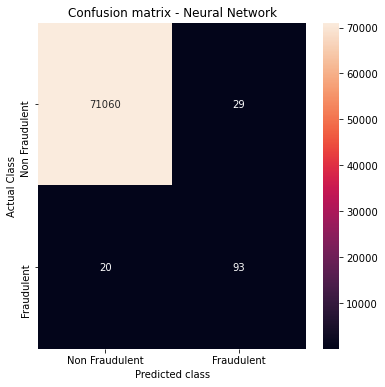

In [29]:
plt.figure(figsize =(6, 6)) 
sns.heatmap(matrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Neural Network") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Text(0.5, 1.0, 'Precision Recall Curve - Neural Network')

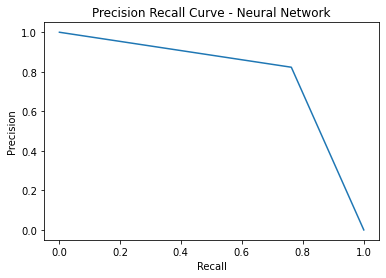

In [30]:
p, r, t = precision_recall_curve(y_test.flatten(), neuralNetworkModel_classes)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Neural Network')

# Deep Neural Network Model

### Train the Model

In [31]:
deepNeuralNetworkModel = Sequential()
deepNeuralNetworkModel

In [32]:
number_inputs = 30
number_hidden_nodes = 200
deepNeuralNetworkModel.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))
deepNeuralNetworkModel.add(Dense(units=number_hidden_nodes,
                activation='relu'))
deepNeuralNetworkModel.add(Dense(units=number_hidden_nodes,
                activation='relu'))
deepNeuralNetworkModel.add(Dense(units=number_hidden_nodes,
                activation='relu'))

In [33]:
number_classes = 2
deepNeuralNetworkModel.add(Dense(units=number_classes, activation='softmax'))

## Model Summary

In [34]:
deepNeuralNetworkModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               6200      
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 402       
Total params: 127,202
Trainable params: 127,202
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

Now that we have our model architecture defined, we must compile the model using a loss function and optimizer. We can also specify additional training metrics such as accuracy.

In [35]:
deepNeuralNetworkModel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training the Model
Finally, we train our model using our training data

In [36]:
# Fit (train) the model
deepNeuralNetworkModel.fit(
    X_train_scaled,
    y_train_categorical,
    validation_data=(X_test_scaled,  y_test_categorical),
    epochs=100,
    verbose=2
)

Epoch 1/100
6676/6676 - 24s - loss: 0.0068 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 2/100
6676/6676 - 22s - loss: 0.0048 - accuracy: 0.9993 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 3/100
6676/6676 - 22s - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 4/100
6676/6676 - 22s - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0061 - val_accuracy: 0.9992
Epoch 5/100
6676/6676 - 22s - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0052 - val_accuracy: 0.9993
Epoch 6/100
6676/6676 - 22s - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0056 - val_accuracy: 0.9990
Epoch 7/100
6676/6676 - 22s - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 8/100
6676/6676 - 23s - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 9/100
6676/6676 - 23s - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0052 - val_accuracy: 0.9992
Epoch 10/100
6676/6676 - 22s - loss: 0.0040 - accuracy: 0.9994 -

6676/6676 - 17s - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 80/100
6676/6676 - 18s - loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 81/100
6676/6676 - 16s - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 82/100
6676/6676 - 14s - loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 83/100
6676/6676 - 15s - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 84/100
6676/6676 - 16s - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 85/100
6676/6676 - 16s - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 86/100
6676/6676 - 16s - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 87/100
6676/6676 - 16s - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 88/100
6676/6676 - 14s - loss: 0.0035 - accuracy: 0.9995 - val

## Quantifying the Model

In [37]:
model_loss, model_accuracy = deepNeuralNetworkModel.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2226/2226 - 4s - loss: 0.0032 - accuracy: 0.9994
Loss: 0.003171726129949093, Accuracy: 0.9994101524353027


In [38]:
# predict probabilities for test set
deepNeuralNetworkModel_probs = deepNeuralNetworkModel.predict(X_test_scaled, verbose=0)
# predict crisp classes for test set
deepNeuralNetworkModel_classes = deepNeuralNetworkModel.predict_classes(X_test_scaled, verbose=0)

C:\Users\dalsa\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [39]:
# reduce to 1d array
deepNeuralNetworkModel_probs = deepNeuralNetworkModel_probs.flatten()
deepNeuralNetworkModel_classes = deepNeuralNetworkModel_classes.flatten()

In [40]:
y_test.flatten()

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test.flatten(), deepNeuralNetworkModel_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test.flatten(), deepNeuralNetworkModel_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test.flatten(), deepNeuralNetworkModel_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.flatten(), deepNeuralNetworkModel_classes)
print('F1 score: %f' % f1)

Accuracy: 0.999410
Precision: 0.851485
Recall: 0.761062
F1 score: 0.803738


In [42]:
matrix = confusion_matrix(y_test.flatten(), deepNeuralNetworkModel_classes)
print(matrix)

[[71074    15]
 [   27    86]]


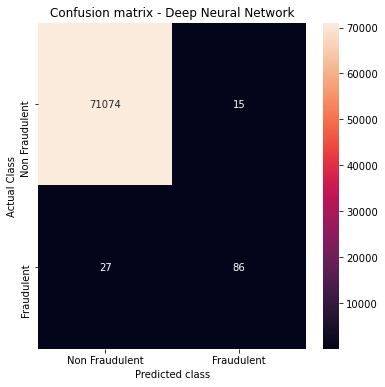

In [43]:
plt.figure(figsize =(6, 6)) 
sns.heatmap(matrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Deep Neural Network") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Text(0.5, 1.0, 'Precision Recall Curve - Deep Neural Network')

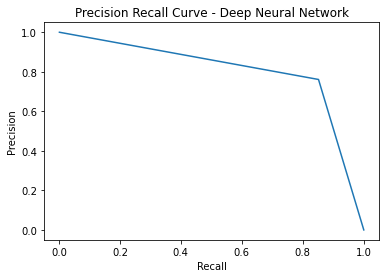

In [44]:
p, r, t = precision_recall_curve(y_test.flatten(), deepNeuralNetworkModel_classes)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Deep Neural Network')